In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz 
from pandas.plotting import radviz, parallel_coordinates
import matplotlib.pyplot as plt
from sklearn import metrics
import Orange
import matplotlib

# BIOLAB DATA SET

In [2]:
#file="biolab.si/lung.tab"
#file="biolab.si/braintumor.tab"
#file="biolab.si/leukemia.tab" # run
#file="biolab.si/MLL.tab" # run
#file="biolab.si/lungGSE1987.tab"
#file="biolab.si/SRBCT.tab"
#file="biolab.si/prostata.tab"


In [2]:
#file="biolab.si/leukemia.tab" # run
#file="biolab.si/MLL.tab" # run
#file="biolab.si/SRBCT.tab" # run
#file="biolab.si/lungGSE1987.tab" # run
file="biolab.si/prostata.tab" #run
#file="biolab.si/braintumor.tab" # run
#file="biolab.si/lung.tab"

data=Orange.data.Table(file)
x=data.X
y=data.Y

In [3]:
att=data.domain.attributes
gene_name=[data.domain.attributes[i].name for i in range(len(att)) ]
gene_name[:5]

['t', '31308_at', '31309_r_at', '31310_at', '31311_at']

In [4]:
gene=data.domain.class_var.values
gene_class=[data.domain.class_var.values[np.int(i)] for i in y]
np.unique(gene_class)

array(['normal', 'tumor'],
      dtype='<U6')

In [5]:
x=pd.DataFrame(x)
x=(x-x.min())/(x.max()-x.min())

In [6]:
x.shape

(102, 12533)

In [7]:
#x=x.fillna(0)
x.isnull().sum().sum()

0

In [106]:
def cradviz(x,alpha):
    #alpha
    m=len(x)
    theta=np.zeros(m)
    for i in range(m):
        theta[i]=alpha[i]#*x[i]+alpha[i,1]*(1-x[i])
    anchor=np.array([np.cos(theta),np.sin(theta)])
    if np.sum(x)!=0.0:
        p=np.dot(anchor,x)/np.sum(x)
    else:
        p=np.zeros(2)
    #p=np.dot(anchor,x) # Star coordinates
    return p

In [9]:
def circleradviz(X,a):
	#p=sum 
	(n,m)=X.shape
	Y=np.zeros((n,2))
	for i in range(n):
		Y[i]=cradviz(X[i],a)
	return Y

In [11]:
def DimensionAnchor(m):
    an=np.zeros(m)
    for i in range(m):
        an[i]=i*np.pi*2/m
    return an

In [12]:
#from sklearn.lda import LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.neighbors.nearest_centroid import NearestCentroid
lda = LDA(n_components=2)
pca=PCA(n_components=2)
clf = NearestCentroid()

In [17]:
m=7
anchor=DimensionAnchor(m)
best_score=0.0

col=x.columns.values
select=col[range(m)]
X=x[select].values

#Y=circleradviz(X,anchor)
#Y = lda.fit(X, y).transform(X)
#Y = pca.fit(X, y).transform(X)
#Y=X
clf.fit(X, y)
best_score=clf.score(X,y)
#best_score=metrics.silhouette_score(Y, y, metric='sqeuclidean') 


best_select=select
print(best_score,best_select)




0.558823529412 [0 1 2 3 4 5 6]


In [18]:
#m=8
#anchor=DimensionAnchor(m)
#best_score=0.0
#col=x.columns.values
#select=[1335+1,3544+1,1395+1,3993+1,186+1]
select=best_select#col[range(m)]
X=x[select].values
#Y=circleradviz(X,anchor)
#Y = lda.fit(X, y).transform(X)
#Y = pca.fit(X, y).transform(X)
Y=X
clf.fit(X, y)
best_score=clf.score(X,y)
#best_score=metrics.silhouette_score(Y, y, metric='sqeuclidean')


best_select=select

for i in col[0:]:
    select=best_select.copy()
    if (i not in best_select):
        for j in range(m):
            c_select=select.copy()
            if (c_select[j]!=i):
                c_select[j]=i
                X=x[c_select].values
                Y=X
                #Y=circleradviz(X,anchor)
                #score=metrics.silhouette_score(Y, y, metric='sqeuclidean') 
                clf.fit(X,y)
                score=clf.score(X,y)
                
                if (best_score<score):
                    best_score=score
                    best_select=c_select#.copy()
                
print(best_score)
print(best_select)

0.970588235294
[ 137 6117 2734 4394 6770 2827 6553]


In [16]:
select=best_select#col[range(m)]
X=x[select].values
#Y=circleradviz(X,anchor)
#Y = lda.fit(X, y).transform(X)
#Y = pca.fit(X, y).transform(X)
Y=X

clf.fit(X, y)
best_score=clf.score(X,y)

best_select=select

for i in col[0:]:
    select=best_select.copy()
    if (i not in best_select):
        for j in range(m):
            c_select=select.copy()
            if (c_select[j]!=i):
                c_select[j]=i
                X=x[c_select].values
                Y=X
                #Y=circleradviz(X,anchor)
                #score=metrics.silhouette_score(Y, y, metric='sqeuclidean') 
                clf.fit(X,y)
                score=clf.score(X,y)
                
                if (best_score<score):
                    best_score=score
                    best_select=c_select#.copy()
                
print(best_score)
print(best_select)

0.970588235294
[6322  201  137  421 6365  202]


In [168]:
print(file,best_score,best_select)

biolab.si/lung.tab 0.980295566502 [ 821  229  226   69  688 7202]


In [ ]:
'''
biolab.si/leukemia.tab 1.0 [1555 3065   17  181]
biolab.si/MLL.tab 1.0 [3641    1 2971  268]
biolab.si/SRBCT.tab 1.0 [   0 1002  383 1157  741]
biolab.si/lungGSE1987.tab 1.0 [ 333  130 1950  983]
biolab.si/prostata.tab 0.980392156863 [ 201 2447  137 5886 5967]
biolab.si/braintumor.tab 0.975 [ 617   82 2666 1639]                                    
biolab.si/braintumor.tab 0.975 [ 582  232  905   82 5520]
biolab.si/lung.tab 0.980295566502 [ 821  229  226   69  688 7202]
'''

Score:  0.308223907015


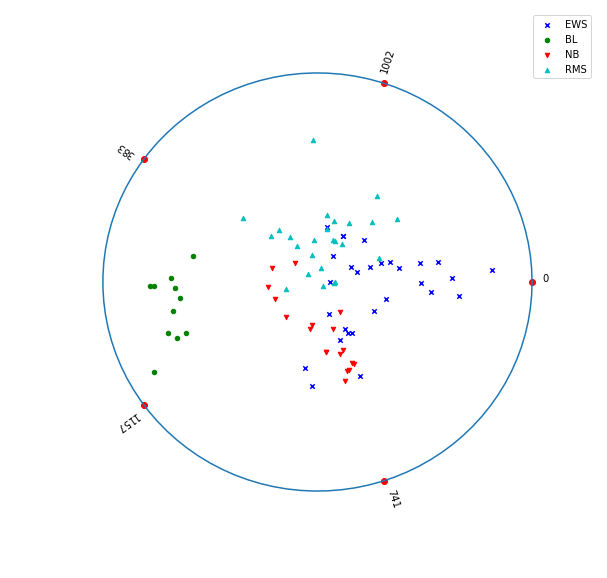

In [108]:
select=best_select
X=x[select].values
Y=circleradviz(X,anchor)

best_score=metrics.silhouette_score(Y, y, metric='sqeuclidean') 
print('Score: ', best_score)

# define color
classes=np.unique(y)
#colors=plt.cm.rainbow(np.linspace(0,1,len(classes)))
colors=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
markers=['x','o','v','^','>','<','s','p','h']
cm = matplotlib.colors.ListedColormap(colors)

plt.figure(figsize=(10,10))
cy=pd.factorize(y)[0]
t=np.linspace(0,2*np.pi,100)
plt.plot(np.cos(t),np.sin(t))


for i in range(m):
    al=anchor[i]
    r=1.05
    #plt.text(r*np.cos(al),r*np.sin(al),gene_name[select[i]],rotation=i*360/m,rotation_mode='anchor')
    plt.text(r*np.cos(al),r*np.sin(al),str(select[i]),rotation=i*360/m,rotation_mode='anchor')
    plt.scatter(np.cos(al),np.sin(al),c='r')

#plt.scatter(Y[:,0],Y[:,1],c=y,cmap=cm,marker='x',s=20)
for g in classes:
    YY=Y[y==g]
    #plt.scatter(YY[:,0],YY[:,1],c=colors[np.int(g)],marker=markers[np.int(g)],s=20,label=gene[np.int(g)])
    plt.scatter(YY[:,0],YY[:,1],c=colors[np.int(g)],marker=markers[np.int(g)],s=20,label=gene[np.int(g)])
    
plt.legend()

plt.xlim(-1.3,1.3)
plt.ylim(-1.3,1.3)

plt.axis('off')
#plt.savefig(file[10:][:-3]+'png')
plt.show()

In [102]:
select=best_select
df=x[select]
df['Name']=y

C:\Users\tvlon\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


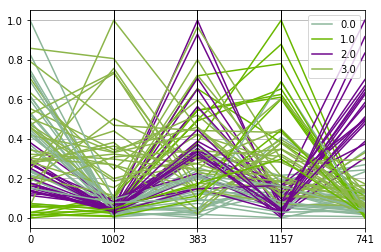

In [103]:
parallel_coordinates(df,'Name')
plt.show()

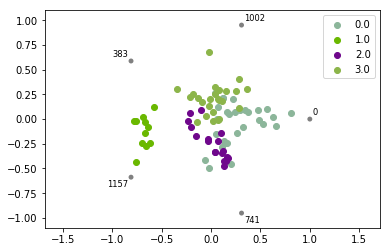

In [104]:
radviz(df,'Name')
plt.show()

Score:  0.357337787239


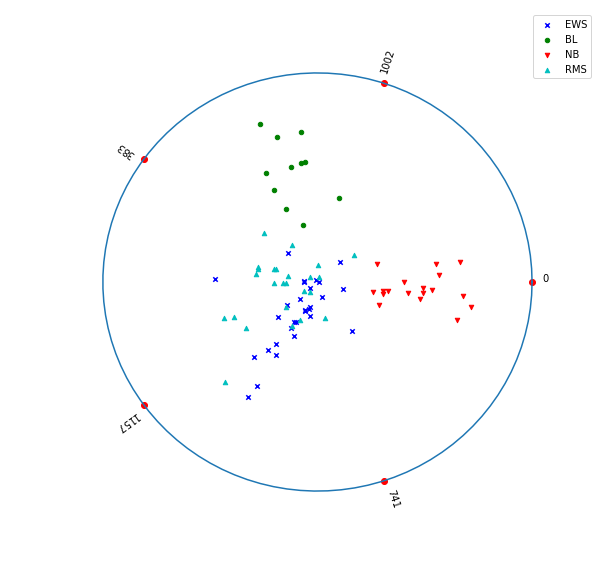

In [107]:
#Y = pca.fit(X, y).transform(X)
select=best_select
X=x[select].values
#Y=circleradviz(X,anchor)
Y = pca.fit(X).transform(X)

best_score=metrics.silhouette_score(Y, y, metric='sqeuclidean') 
print('Score: ', best_score)

# define color
classes=np.unique(y)
#colors=plt.cm.rainbow(np.linspace(0,1,len(classes)))
colors=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
markers=['x','o','v','^','>','<','s','p','h']
cm = matplotlib.colors.ListedColormap(colors)

plt.figure(figsize=(10,10))
cy=pd.factorize(y)[0]
t=np.linspace(0,2*np.pi,100)
plt.plot(np.cos(t),np.sin(t))


for i in range(m):
    al=anchor[i]
    r=1.05
    #plt.text(r*np.cos(al),r*np.sin(al),gene_name[select[i]],rotation=i*360/m,rotation_mode='anchor')
    plt.text(r*np.cos(al),r*np.sin(al),str(select[i]),rotation=i*360/m,rotation_mode='anchor')
    plt.scatter(np.cos(al),np.sin(al),c='r')

#plt.scatter(Y[:,0],Y[:,1],c=y,cmap=cm,marker='x',s=20)
for g in classes:
    YY=Y[y==g]
    #plt.scatter(YY[:,0],YY[:,1],c=colors[np.int(g)],marker=markers[np.int(g)],s=20,label=gene[np.int(g)])
    plt.scatter(YY[:,0],YY[:,1],c=colors[np.int(g)],marker=markers[np.int(g)],s=20,label=gene[np.int(g)])
    
plt.legend()

plt.xlim(-1.3,1.3)
plt.ylim(-1.3,1.3)

plt.axis('off')
#plt.savefig(file[10:][:-3]+'png')
plt.show()